# Offline Evaluation Metrics Visualizations

This notebook visualizes user-specific performance metrics of various recommenders in the mind-subset dataset to assess effectiveness and ranking overlap. We explore two metric groups:

1. **Effectiveness Metrics**: We use ranking-based metrics, Normalized Discounted Cumulative Gain (NDCG) and Reciprocal Rank (RR), to evaluate recommender effectiveness.
2. **Ranking Overlap Metrics**: We use Rank-Based Overlap (RBO) to assess consistency in top-k recommendations relative to final rankings.

> [!NOTE]
> This is a *parameterized* notebook, and is used to render the other specific evaluation notebooks with [Papermill](https://papermill.readthedocs.io/en/latest/).  By default, it displays
> the MIND Subset results, for easy editing.

In [1]:
EVAL_NAME = "mind-subset"

In [2]:
# Parameters
EVAL_NAME = "mind-subset"


## Setup

### Importing Libraries

PyData packages:

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

Local code and display support:

In [4]:
from IPython.display import HTML

from poprox_recommender.eval_tables import EvalTable

### Loading Data

In [5]:
mind_subset_user_metrics = pd.read_csv(f"../outputs/{EVAL_NAME}-slate-metrics.csv.gz")
mind_subset_user_metrics.head()

,pipeline,slate_id,Unnamed: 0,personalized,num_truth,RBP,NDCG@5,NDCG@10,RR,RBO@5,RBO@10,rank_based_entropy,least_item_promoted,intralist_similarity
0,nrms,016e6c5c-fe00-70af-af57-393f46f94a2d,0,True,16,0.764318,1.123089,0.761253,1.000000,0.0,0.0,NaN,0.0,NaN
1,nrms,016e6c60-ce90-7e13-bc17-3f742d912f3a,1,True,1,0.156602,0.000000,0.861353,0.111111,0.0,0.0,NaN,0.0,NaN
2,nrms,016e6c62-f170-7f19-bacd-304c571cce3a,2,True,1,0.216750,0.630930,1.261860,0.200000,0.0,0.0,NaN,0.0,NaN
3,nrms,016e6c63-7640-7f7d-a076-a62820e7cbf9,3,True,2,0.340839,0.000000,0.930677,0.142857,0.0,0.0,NaN,0.0,NaN
4,nrms,016e6c66-d970-733d-8f12-c1583f245921,4,True,1,0.156602,0.000000,0.861353,0.111111,0.0,0.0,NaN,0.0,NaN


In [6]:
effectiveness_metrics = ["NDCG@5", "NDCG@10", "RR"]
overlap_metrics = ["RBO@5", "RBO@10"]

## Results

### Effectiveness Metrics

NDCG measures how well the recommendations align with user test data, focusing on the top-k positions, such as the top 5 (NDCG@5) or top 10 (NDCG@10). Likewise, RR evaluates how well the recommender finds the most relevant item as the top result.

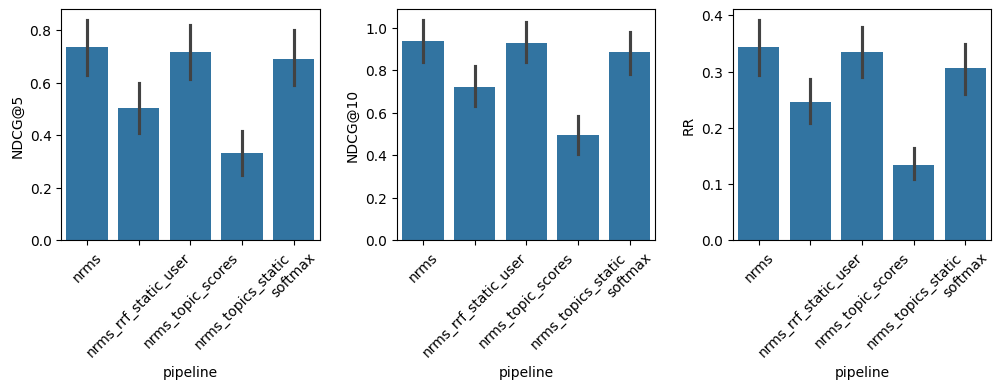

In [7]:
plt.figure(figsize=(12, 3))
plt.subplots_adjust(wspace=0.3)

for i, metric in enumerate(effectiveness_metrics, 1):
    plt.subplot(1, 3, i)
    sns.barplot(data=mind_subset_user_metrics, x="pipeline", y=metric)
    plt.xticks(rotation=45)

plt.show()

The summary tables show the mean values, standard deviation, and quantiles (10%ile, Median, 90%ile), each accompanied by their respective 95% confidence intervals for effectiveness metrics across recommenders.

In [8]:
for metric in effectiveness_metrics:
    tw = EvalTable(mind_subset_user_metrics, "pipeline", metric)
    tw.add_stat("Mean", np.mean, ci=True)
    tw.add_stat("Std Dev", np.std, ci=True)
    tw.add_quantiles(["10%ile", "Median", "90%ile"], [0.1, 0.5, 0.9], ci=True)
    display(HTML(f"<h3>Summary Table for {metric}</h3>"))
    display(HTML(tw.html_table()))

"nrms 0.734(0.631,0.837)","0.841(0.803,0.889)","0.000(0.000,0.000)","0.315(0.000,0.631)","2.000(2.000,2.000)",
"nrms_rrf_static_user 0.503(0.408,0.594)","0.747(0.688,0.818)","0.000(0.000,0.000)","0.000(0.000,0.000)","2.000(2.000,2.000)",
"nrms_topic_scores 0.717(0.608,0.818)","0.835(0.796,0.885)","0.000(0.000,0.000)","0.315(0.000,0.631)","2.000(2.000,2.000)",
"nrms_topics_static 0.332(0.249,0.413)","0.668(0.593,0.758)","0.000(0.000,0.000)","0.000(0.000,0.000)","2.000(1.000,2.000)",
"softmax 0.690(0.582,0.794)","0.839(0.798,0.890)","0.000(0.000,0.000)","0.000(0.000,0.631)","2.000(2.000,2.000)",


"nrms 0.936(0.836,1.038)","0.794(0.762,0.834)","0.000(0.000,0.000)","0.965(0.805,1.000)","2.000(2.000,2.000)",
"nrms_rrf_static_user 0.723(0.630,0.817)","0.750(0.709,0.796)","0.000(0.000,0.000)","0.631(0.354,0.861)","2.000(2.000,2.000)",
"nrms_topic_scores 0.926(0.829,1.023)","0.791(0.758,0.830)","0.000(0.000,0.000)","0.965(0.803,1.000)","2.000(2.000,2.000)",
"nrms_topics_static 0.494(0.403,0.582)","0.717(0.663,0.781)","0.000(0.000,0.000)","0.000(0.000,0.000)","2.000(1.262,2.000)",
"softmax 0.884(0.783,0.983)","0.805(0.772,0.844)","0.000(0.000,0.000)","0.861(0.699,1.000)","2.000(2.000,2.000)",


"nrms 0.344(0.296,0.390)","0.377(0.353,0.406)","0.000(0.000,0.000)","0.200(0.143,0.200)","1.000(1.000,1.000)",
"nrms_rrf_static_user 0.246(0.205,0.285)","0.322(0.288,0.362)","0.000(0.000,0.000)","0.111(0.111,0.143)","1.000(0.400,1.000)",
"nrms_topic_scores 0.336(0.289,0.381)","0.373(0.349,0.404)","0.000(0.000,0.000)","0.200(0.143,0.200)","1.000(1.000,1.000)",
"nrms_topics_static 0.134(0.105,0.160)","0.223(0.181,0.269)","0.000(0.000,0.000)","0.067(0.000,0.077)","0.333(0.333,0.333)",
"softmax 0.307(0.261,0.350)","0.356(0.328,0.390)","0.000(0.000,0.000)","0.143(0.143,0.200)","1.000(1.000,1.000)",


### Ranking Overlap Metrics
RBO measures the similarity between two ranked lists, evaluating how much overlap exists between pure top-k recommendations and the actual rankings produced after recommendations. RBO can be applied at different list depths to analyze performance consistency, such as RBO@5 and RBO@10.

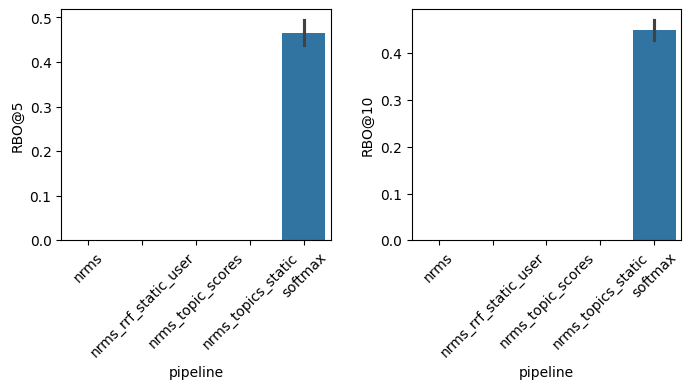

In [9]:
plt.figure(figsize=(8, 3))
plt.subplots_adjust(wspace=0.3)

for i, metric in enumerate(overlap_metrics, 1):
    plt.subplot(1, 2, i)
    sns.barplot(data=mind_subset_user_metrics, x="pipeline", y=metric)
    plt.xticks(rotation=45)

plt.show()

The summary tables show the mean values, standard deviation, and quantiles (10%ile, Median, 90%ile), each accompanied by their respective 95% confidence intervals for ranking overlap metrics across recommenders.

In [10]:
for metric in overlap_metrics:
    tw = EvalTable(mind_subset_user_metrics, "pipeline", metric)
    tw.add_stat("Mean", np.mean, ci=True)
    tw.add_stat("Std Dev", np.std, ci=True)
    tw.add_quantiles(["10%ile", "Median", "90%ile"], [0.1, 0.5, 0.9], ci=True)
    display(HTML(f"<h3>Summary Table for {metric}</h3>"))
    display(HTML(tw.html_table()))

"nrms 0.000(0.000,0.000)","0.000(0.000,0.000)","0.000(0.000,0.000)","0.000(0.000,0.000)","0.000(0.000,0.000)",
"nrms_rrf_static_user 0.000(0.000,0.000)","0.000(0.000,0.000)","0.000(0.000,0.000)","0.000(0.000,0.000)","0.000(0.000,0.000)",
"nrms_topic_scores 0.000(0.000,0.000)","0.000(0.000,0.000)","0.000(0.000,0.000)","0.000(0.000,0.000)","0.000(0.000,0.000)",
"nrms_topics_static 0.000(0.000,0.000)","0.000(0.000,0.000)","0.000(0.000,0.000)","0.000(0.000,0.000)","0.000(0.000,0.000)",
"softmax 0.466(0.438,0.494)","0.227(0.215,0.241)","0.163(0.127,0.163)","0.547(0.547,0.575)","0.681(0.681,0.681)",


"nrms 0.000(0.000,0.000)","0.000(0.000,0.000)","0.000(0.000,0.000)","0.000(0.000,0.000)","0.000(0.000,0.000)",
"nrms_rrf_static_user 0.000(0.000,0.000)","0.000(0.000,0.000)","0.000(0.000,0.000)","0.000(0.000,0.000)","0.000(0.000,0.000)",
"nrms_topic_scores 0.000(0.000,0.000)","0.000(0.000,0.000)","0.000(0.000,0.000)","0.000(0.000,0.000)","0.000(0.000,0.000)",
"nrms_topics_static 0.000(0.000,0.000)","0.000(0.000,0.000)","0.000(0.000,0.000)","0.000(0.000,0.000)","0.000(0.000,0.000)",
"softmax 0.449(0.428,0.471)","0.172(0.159,0.186)","0.221(0.184,0.242)","0.527(0.499,0.535)","0.624(0.617,0.624)",
